In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import sys
import os
import torch
import torch.utils.data as data
import cv2
import numpy as np
import glob
if sys.version_info[0] == 2:
    import xml.etree.cElementTree as ET
else:
    import xml.etree.ElementTree as ET

# from data import VOCDetection, VOC_ROOT, VOCAnnotationTransform
# # here we specify year (07 or 12) and dataset ('test', 'val', 'train') 
# testset = VOCDetection(VOC_ROOT, [('2007', 'test')], None, VOCAnnotationTransform())
# # クラスVOCDetectionはindexをキーに画像を取得する
# img_id = 2586
# image = testset.pull_image(img_id)

# # cv2のチャンネルの順番はBGR（青、緑、赤）なので、RGB（赤、緑、青）に入れ替える
# rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# # View the sampled input image before transform
# plt.figure(figsize=(10,10))
# plt.imshow(rgb_image)
# plt.show()

In [34]:
import torch    


class AnnotationTransform(object):
    def __init__(self, class_to_index=None, keep_difficult=False):
        self.class_to_index = class_to_index
        self.keep_difficult = keep_difficult

    def __call__(self, xml_file):
        """
        Arguments:
            target (annotation) : the target annotation to be made usable
                will be an ET.Element
        Returns:
            a list containing lists of bounding boxes  [bbox coords, class name]
        """
        targets = list()
        
        element = ET.parse(xml_file).getroot()
         # 画像幅
        element_width = int(element.find('size').find('width').text)
        # 画像高さ
        element_height = int(element.find('size').find('height').text)
        # チャネル数
        element_depth = int(element.find('size').find('depth').text)        
        for obj in element.iter('object'):
            difficult = int(obj.find('difficult').text) == 1
            if not self.keep_difficult and difficult:
                continue
            name = obj.find('name').text.lower().strip()
            bbox = obj.find('bndbox')
            
            xmin = (int(bbox.find('xmin').text) - 1)#/element_width
            ymin = (int(bbox.find('ymin').text) - 1)#/element_height
            xmax = (int(bbox.find('xmax').text) - 1)#/element_width
            ymax = (int(bbox.find('ymax').text) - 1)#/element_height     
            
            label_index = self.class_to_index[name]
            
            targets.append([xmin,ymin,xmax,ymax,label_index])
            
        return targets # [[xmin, ymin, xmax, ymax, label_ind], ... ]

In [35]:
CLASSES = ('eyebolt',)
target_transform = AnnotationTransform(class_to_index=dict(zip(CLASSES, range(len(CLASSES)))))

root = r'Z:\object_detection\2019_03_05_151817\data'
annotation_list = glob.glob(os.path.join(root,'annotation','*.xml'))

print(annotation_list[0])

targets = target_transform(annotation_list[0])

print(targets)

Z:\object_detection\2019_03_05_151817\data\annotation\0000000000.xml
[[457, 202, 489, 256, 0], [368, 217, 412, 264, 0], [316, 247, 360, 294, 0], [413, 233, 449, 287, 0], [379, 174, 433, 211, 0], [368, 316, 420, 353, 0], [443, 321, 479, 374, 0]]


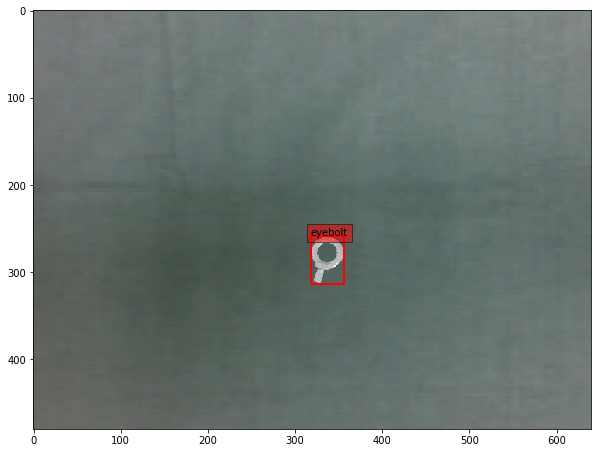

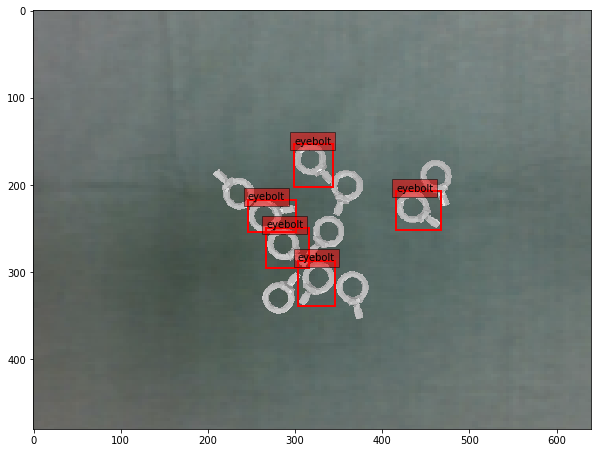

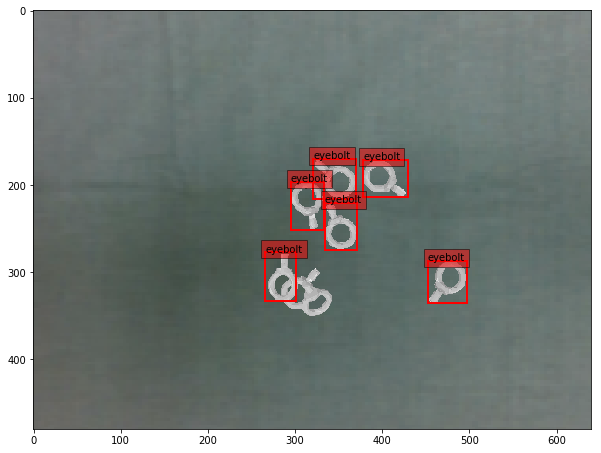

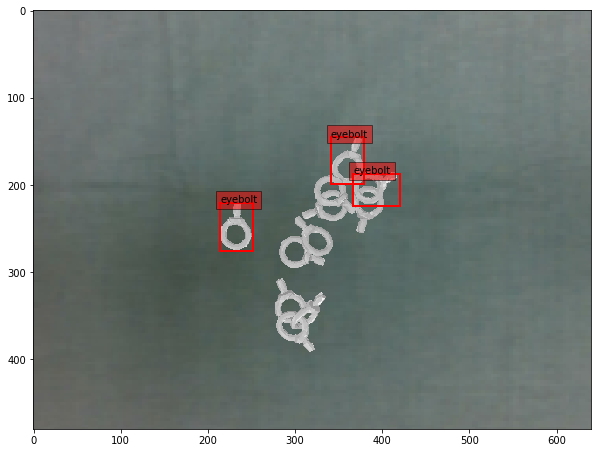

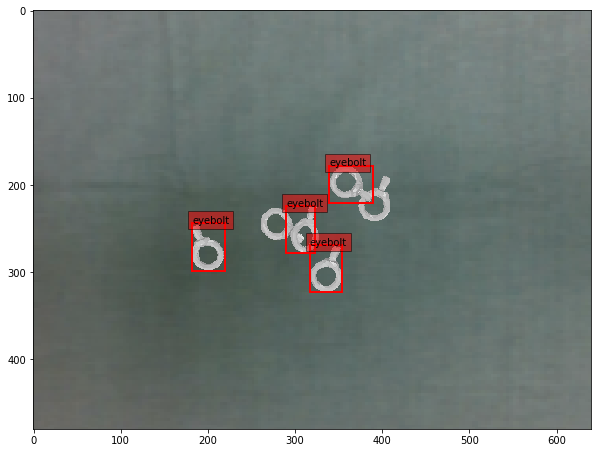

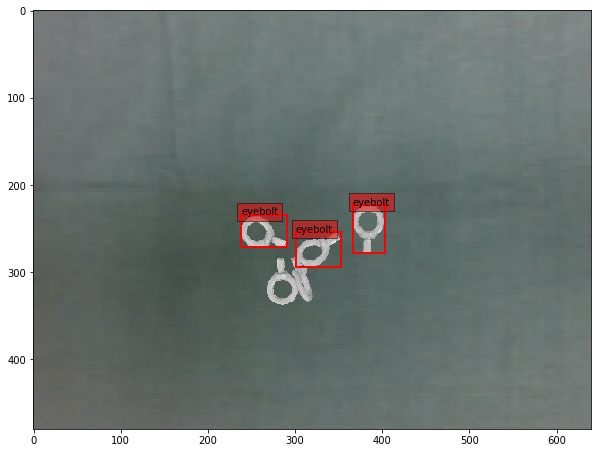

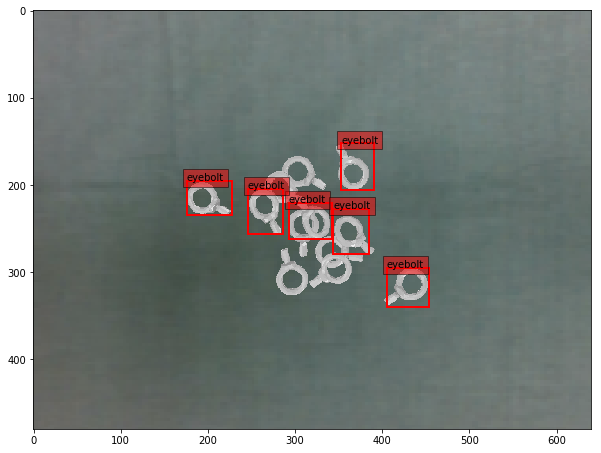

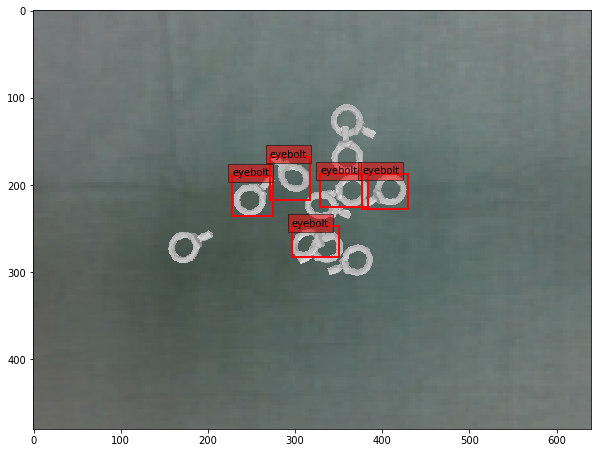

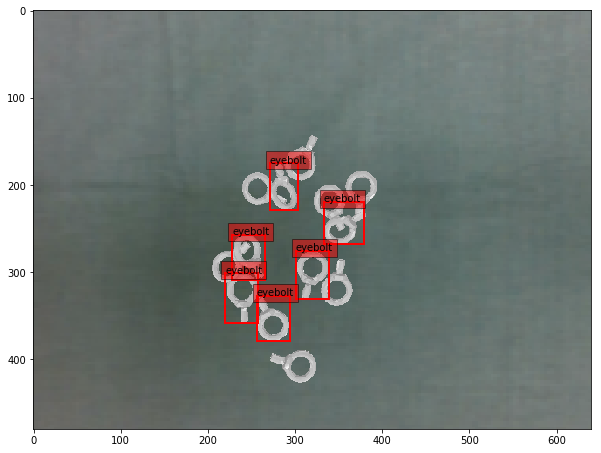

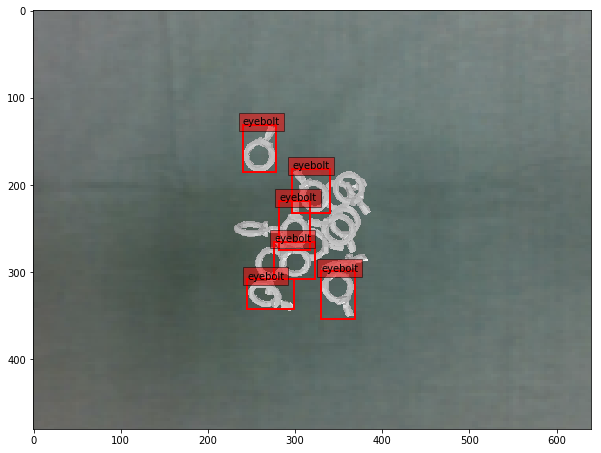

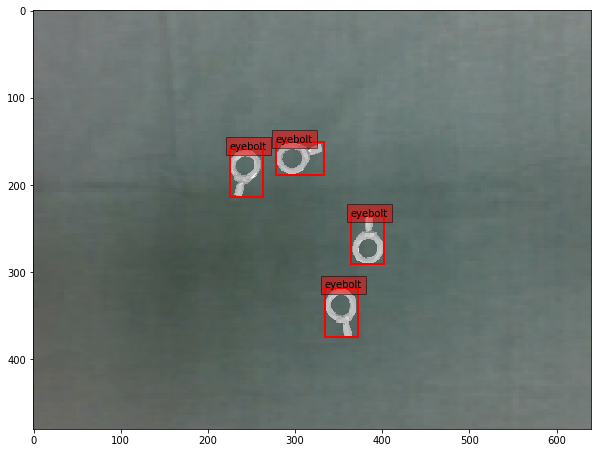

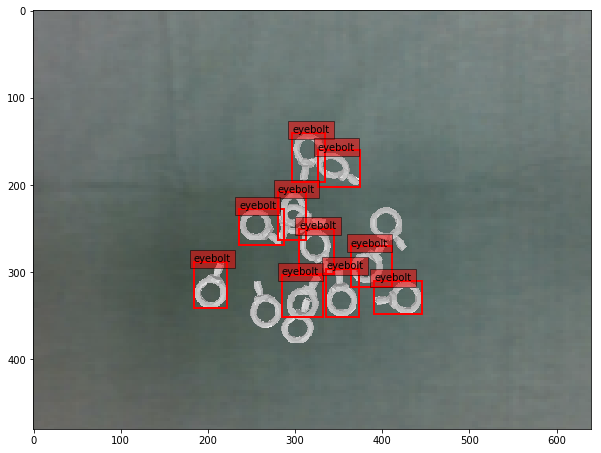

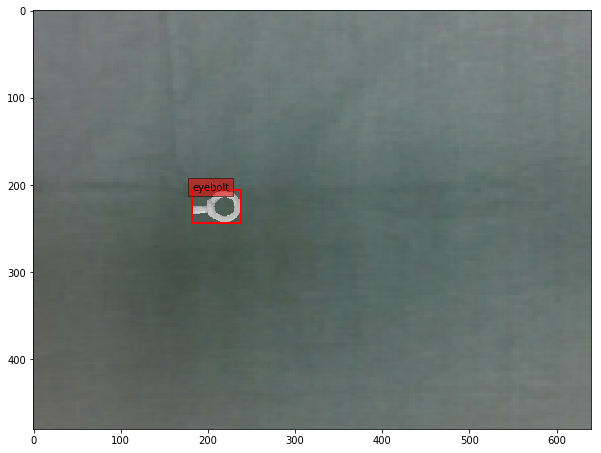

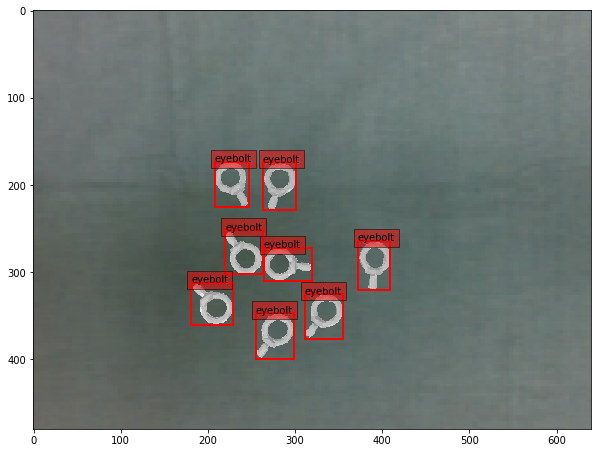

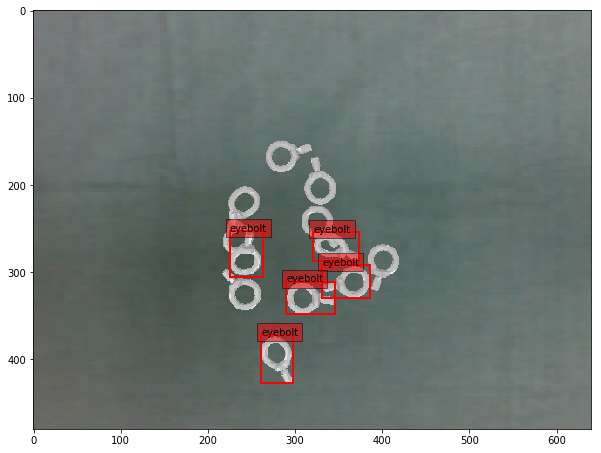

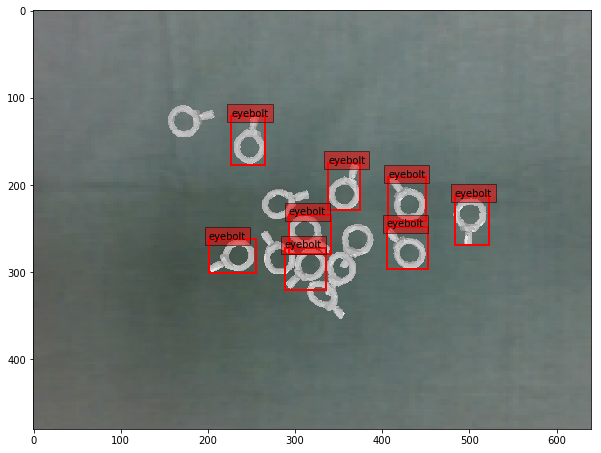

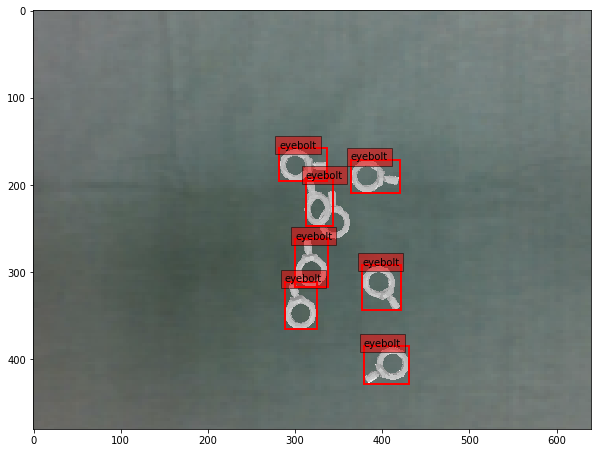

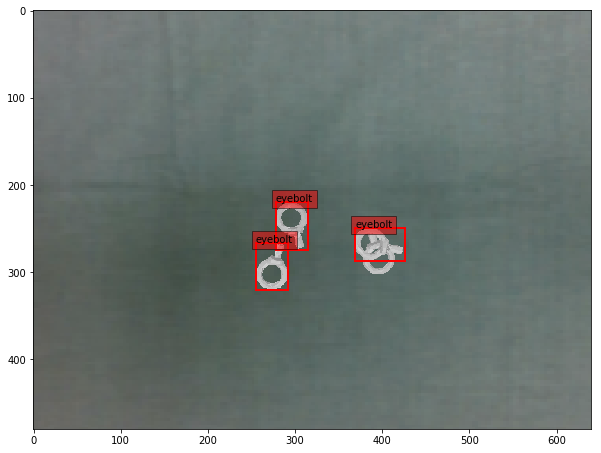

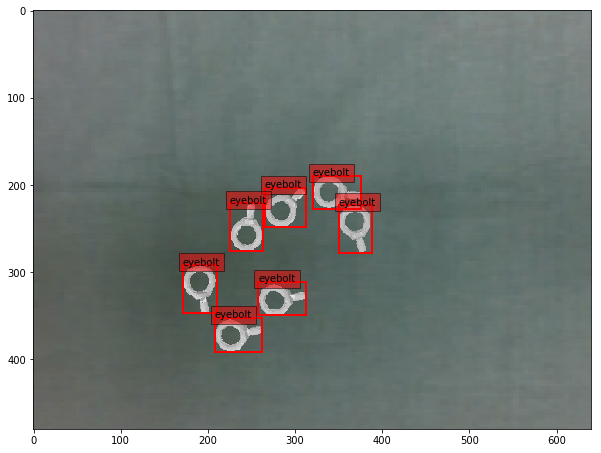

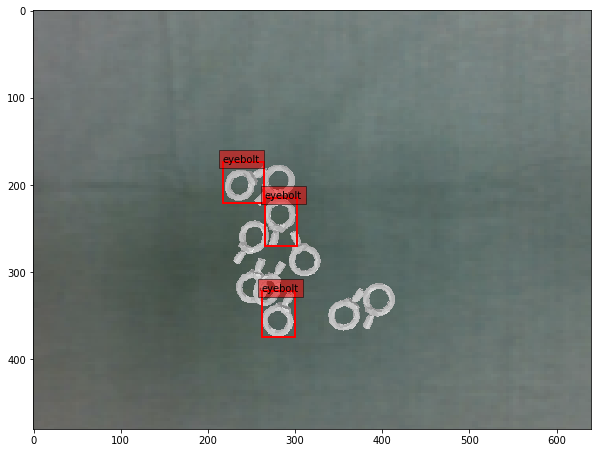

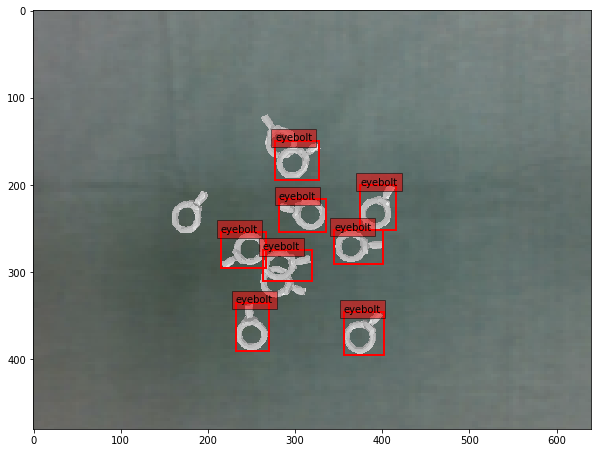

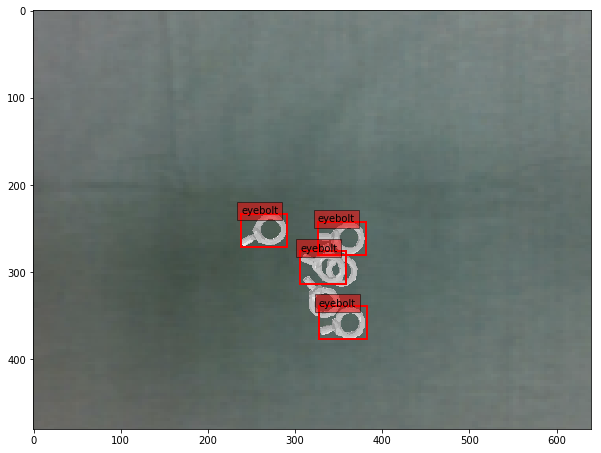

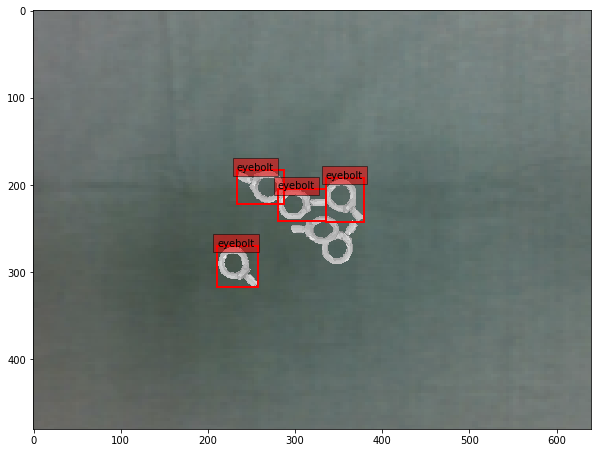

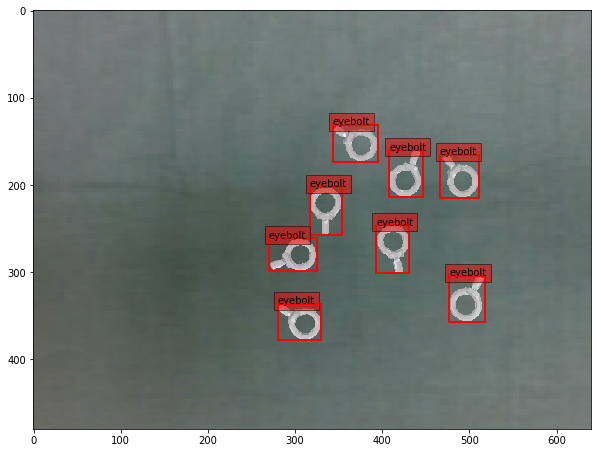

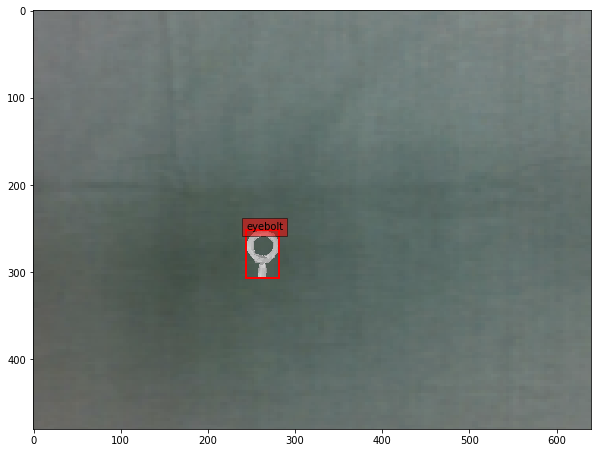

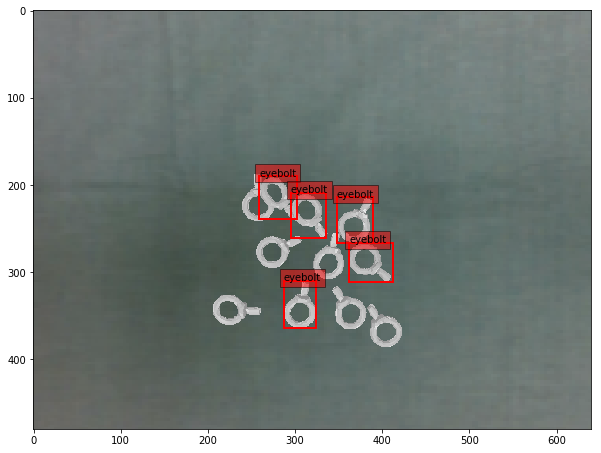

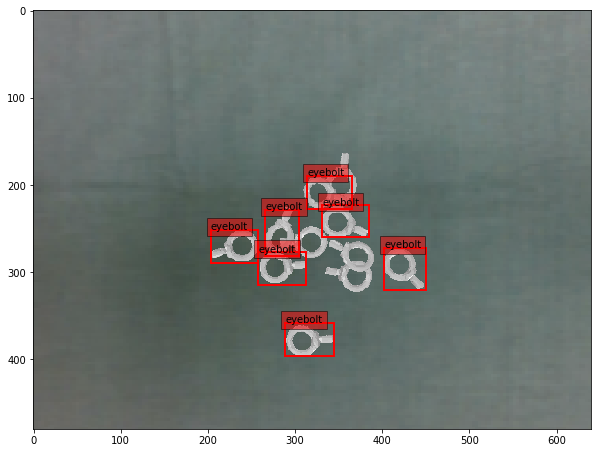

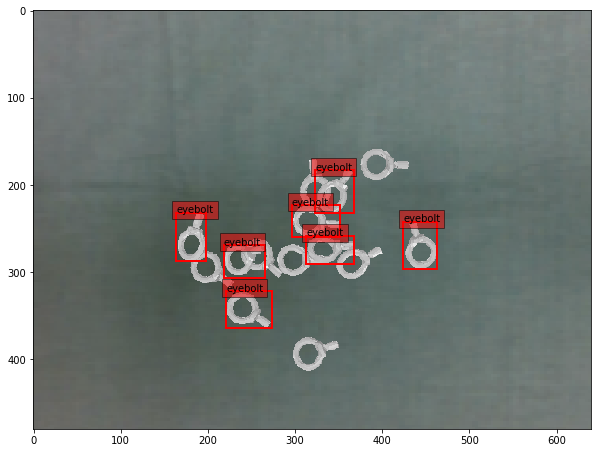

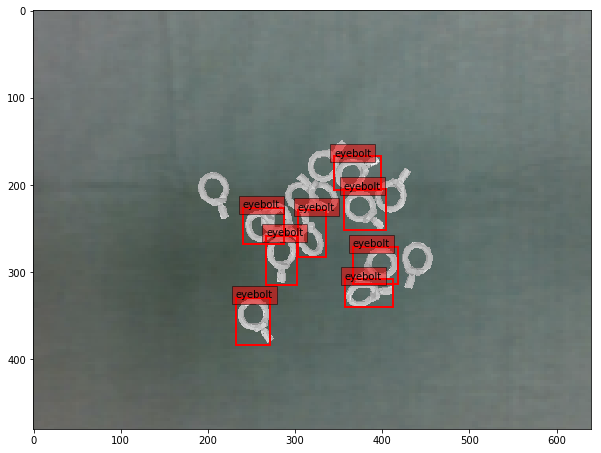

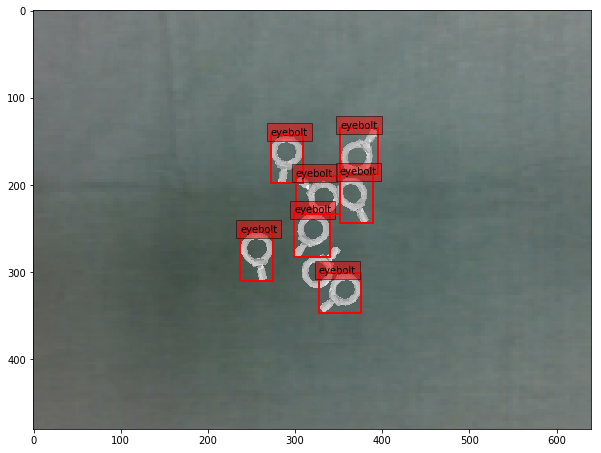

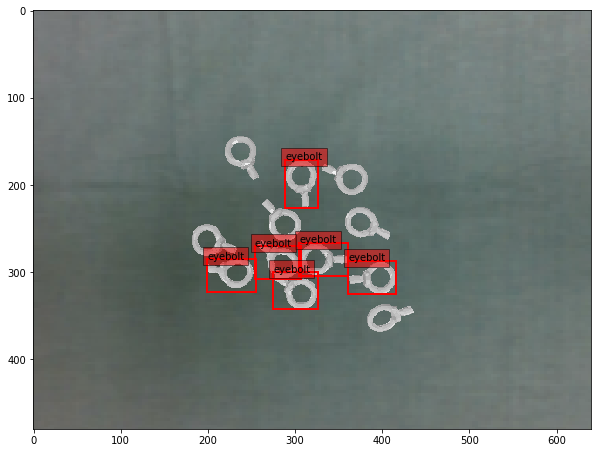

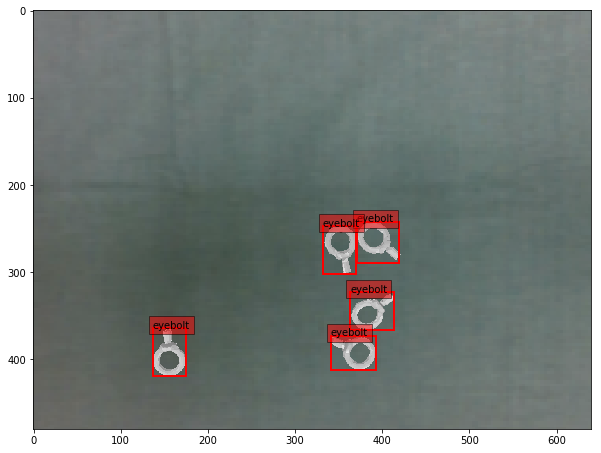

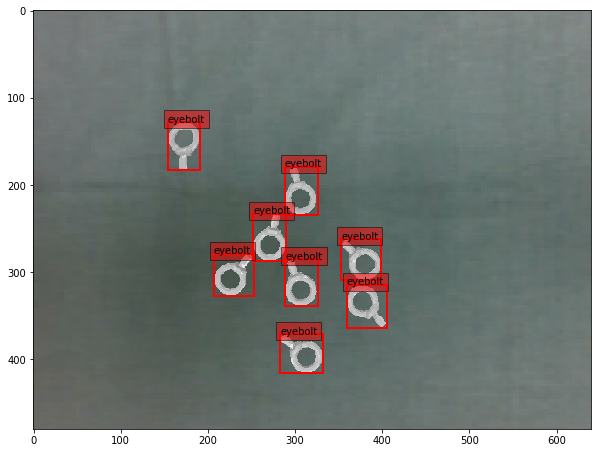

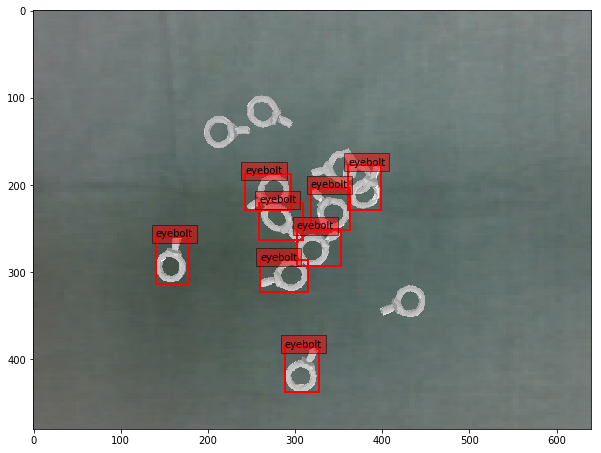

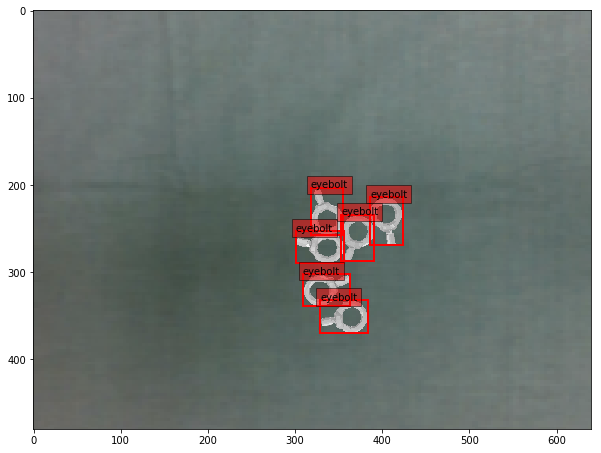

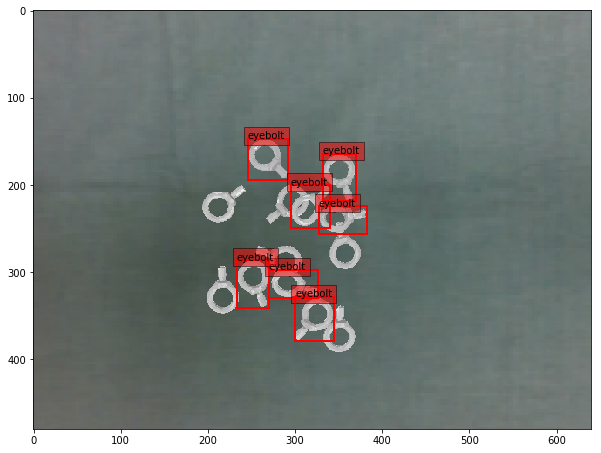

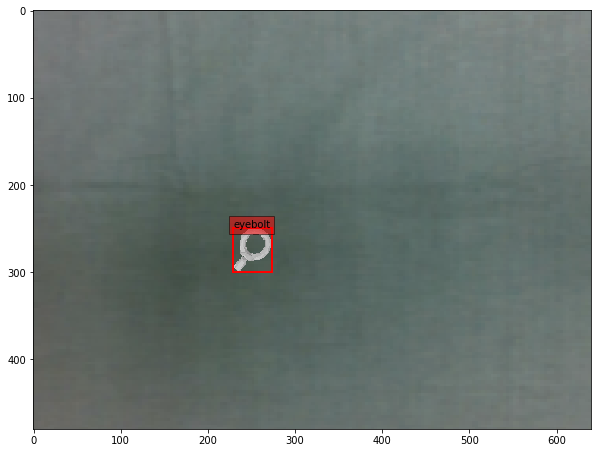

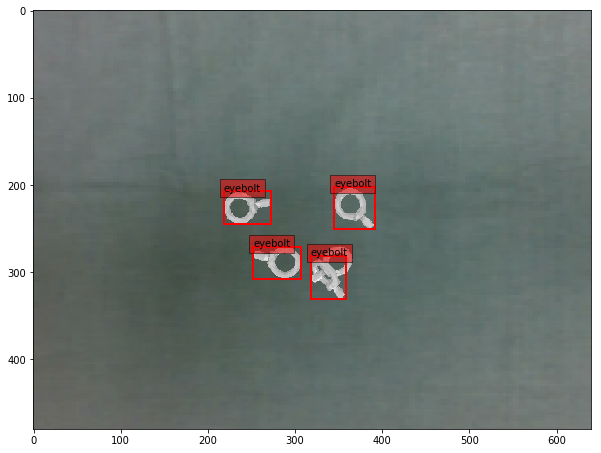

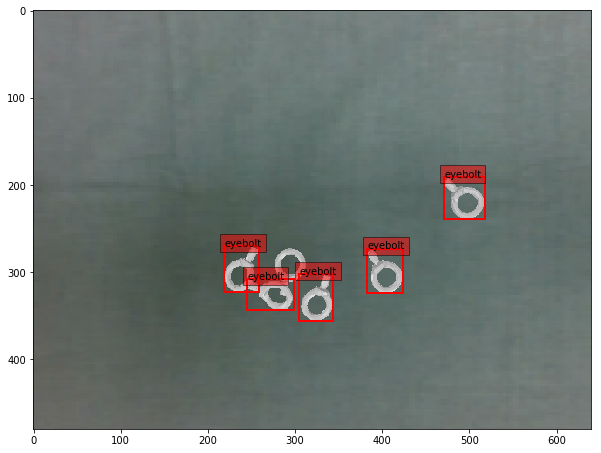

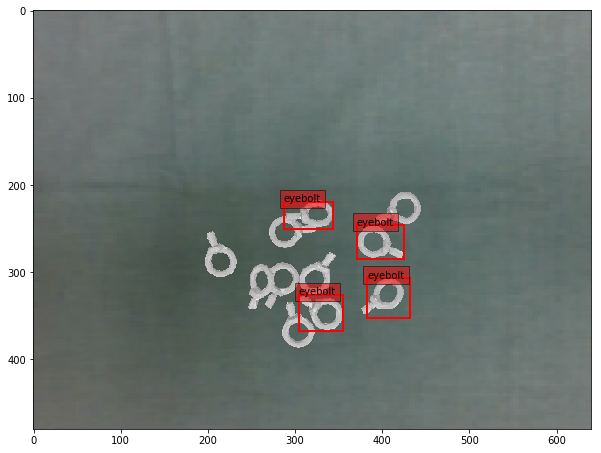

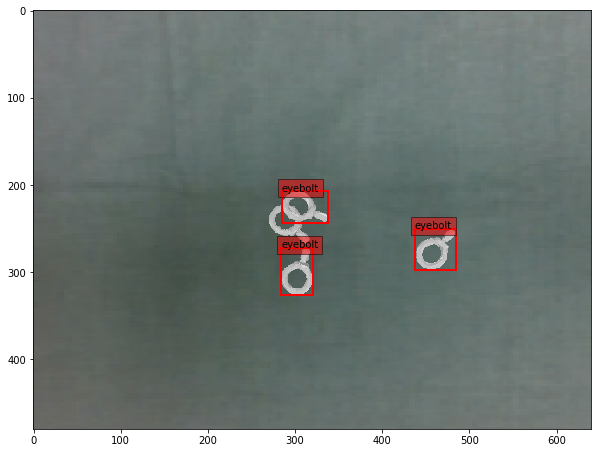

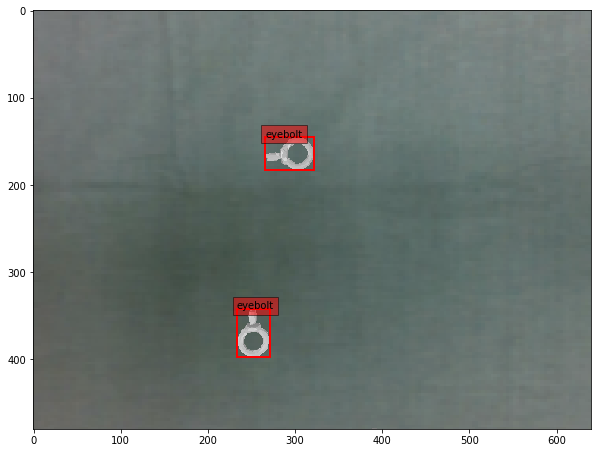

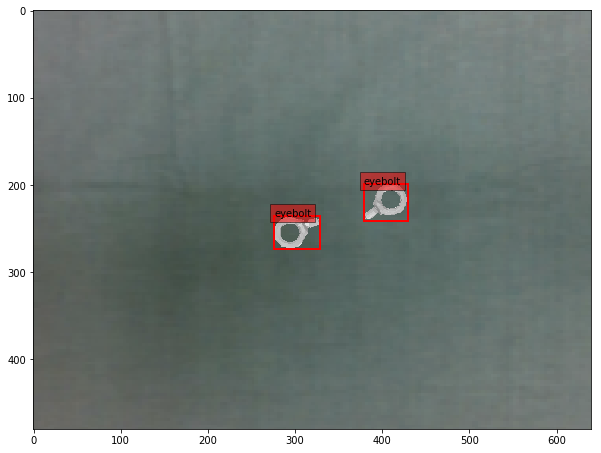

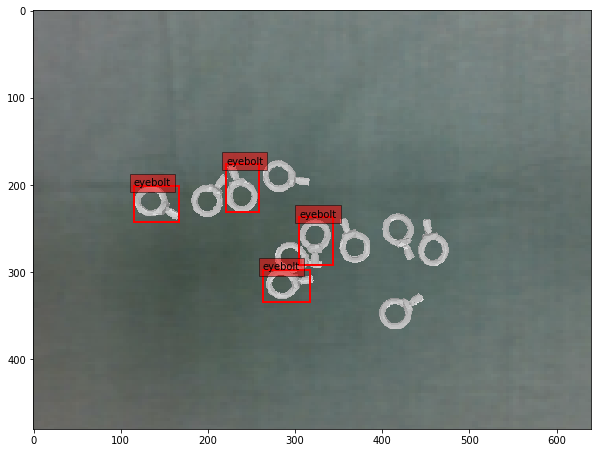

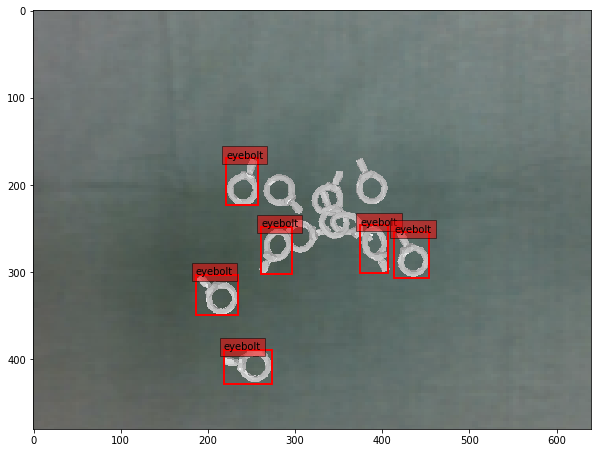

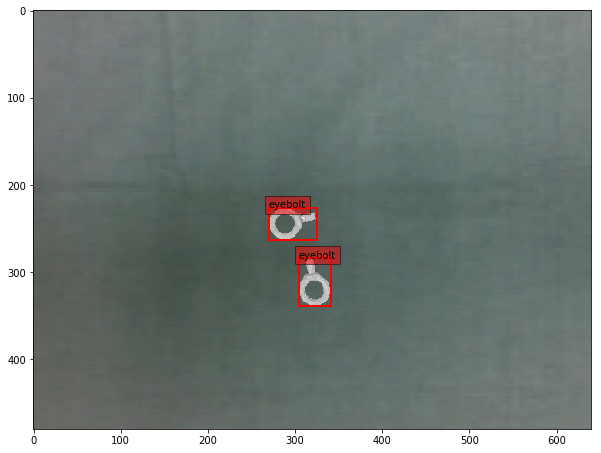

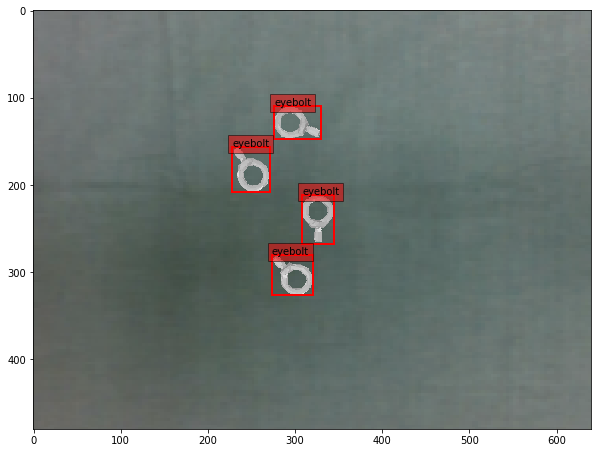

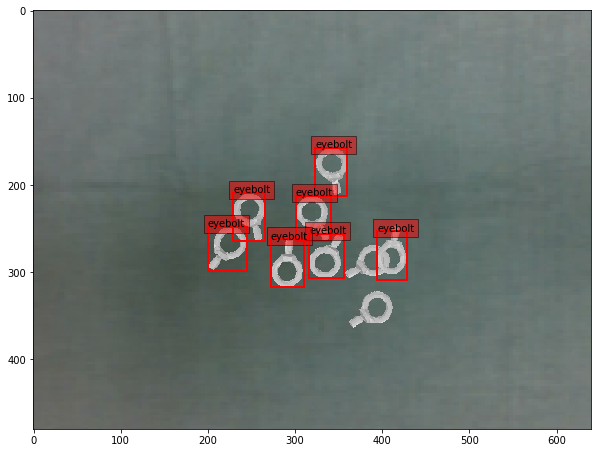

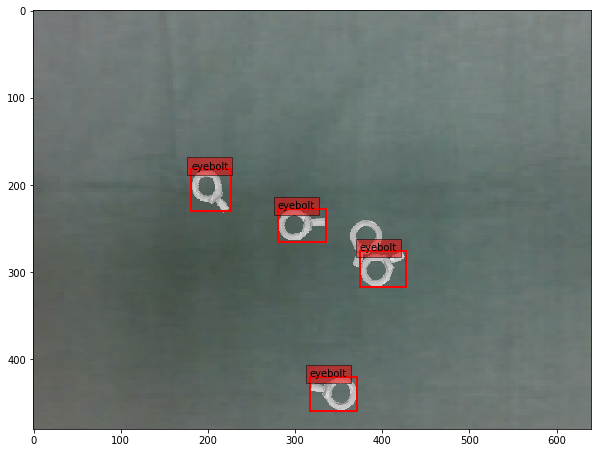

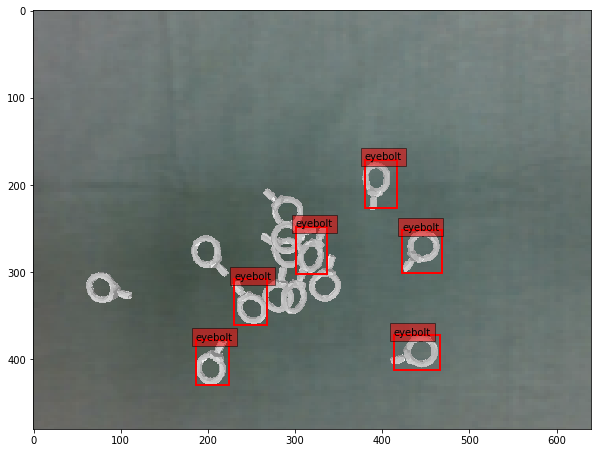

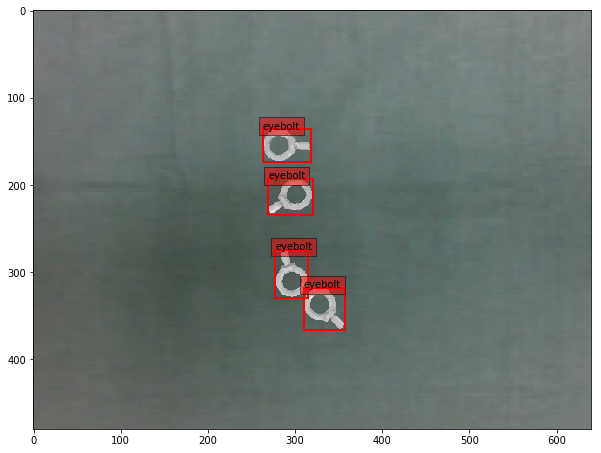

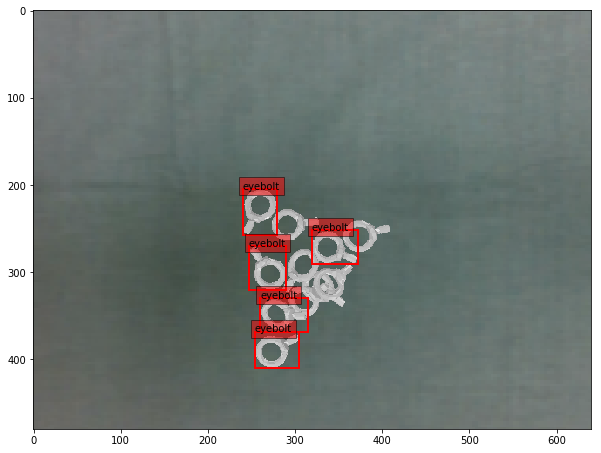

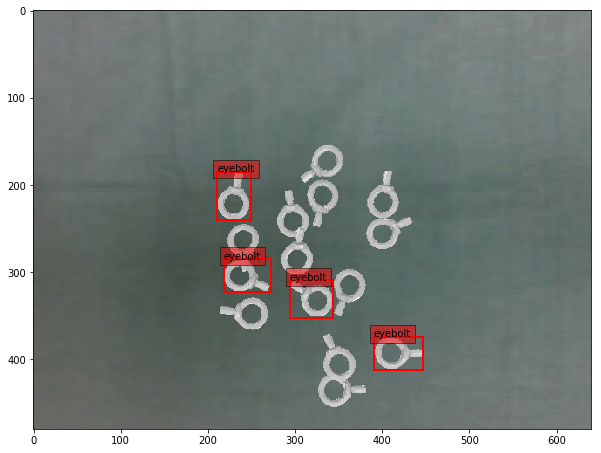

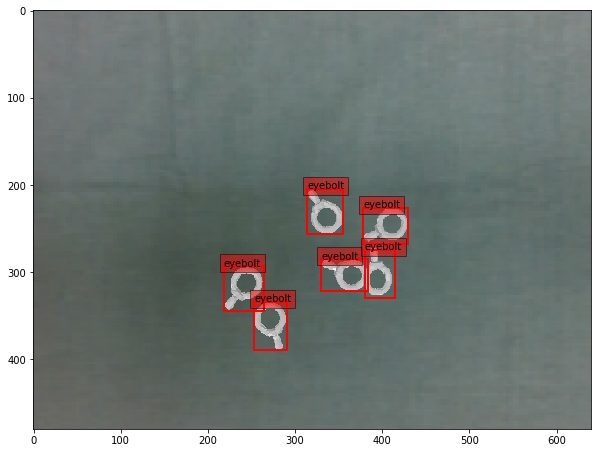

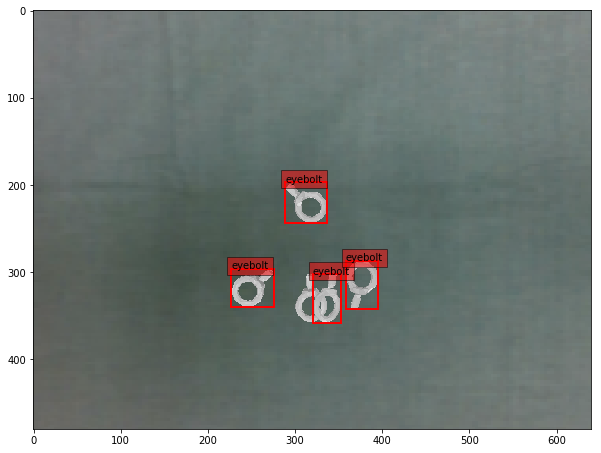

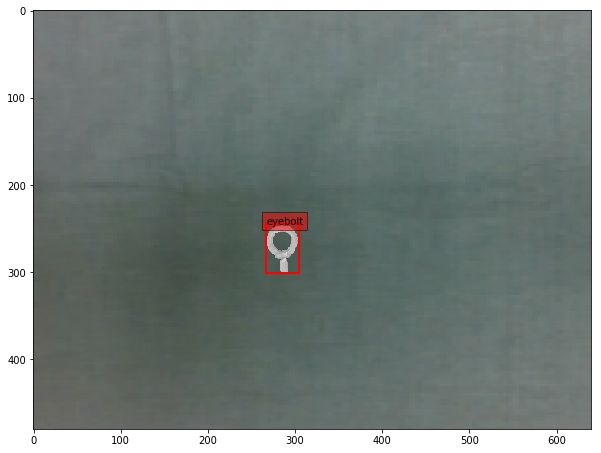

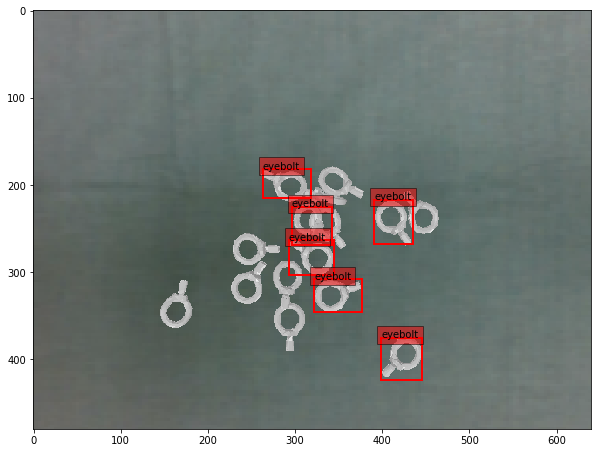

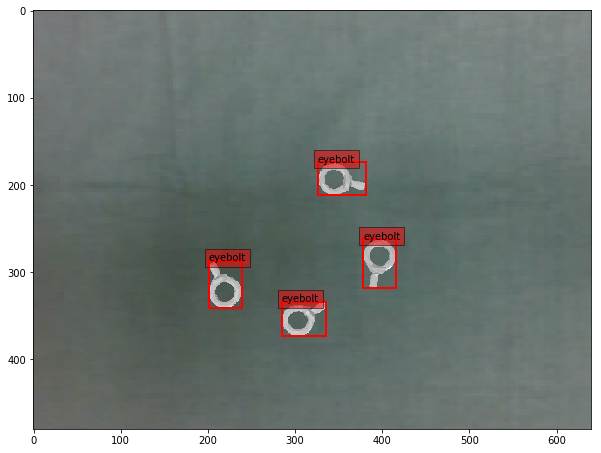

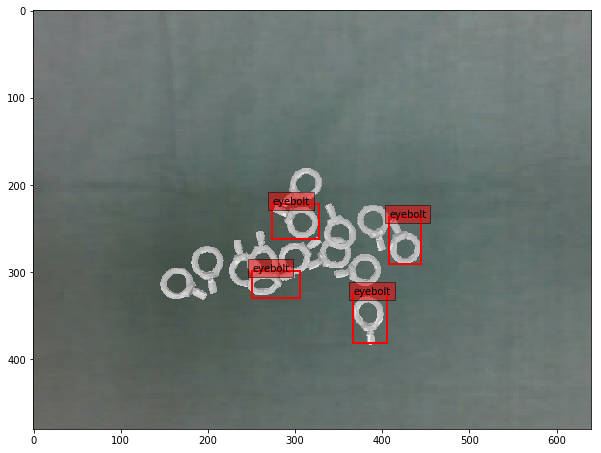

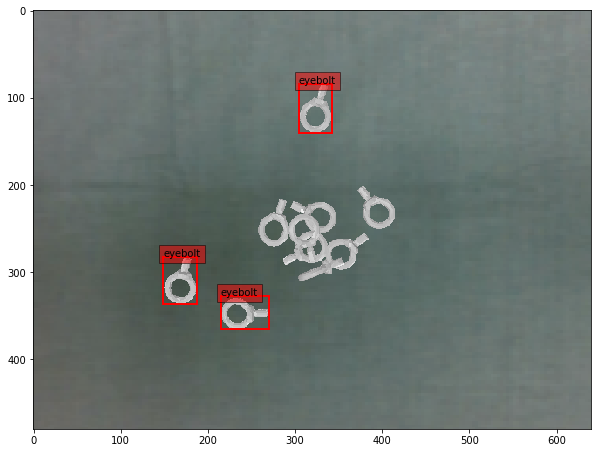

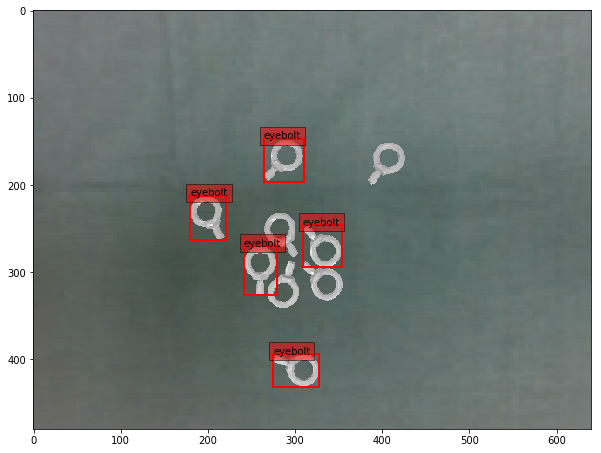

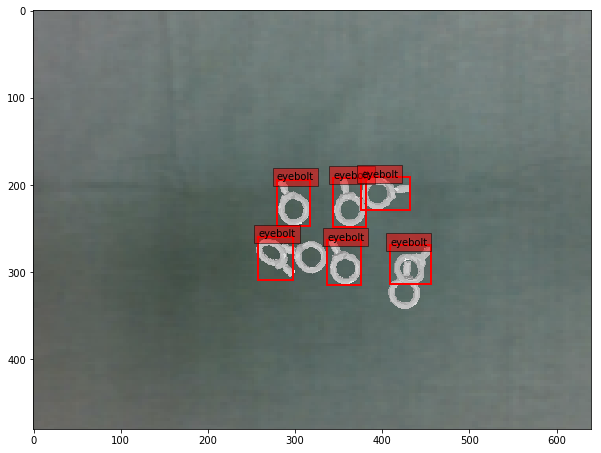

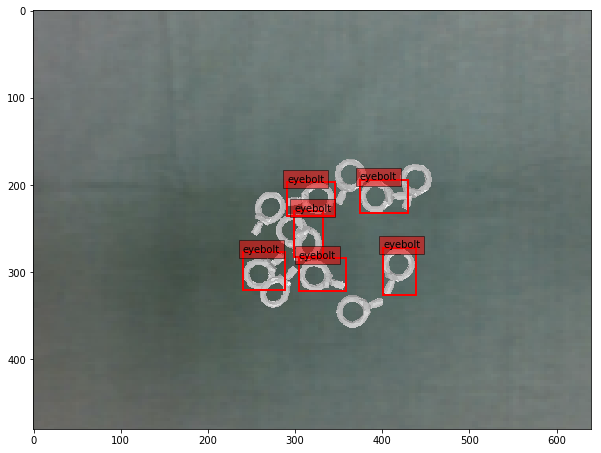

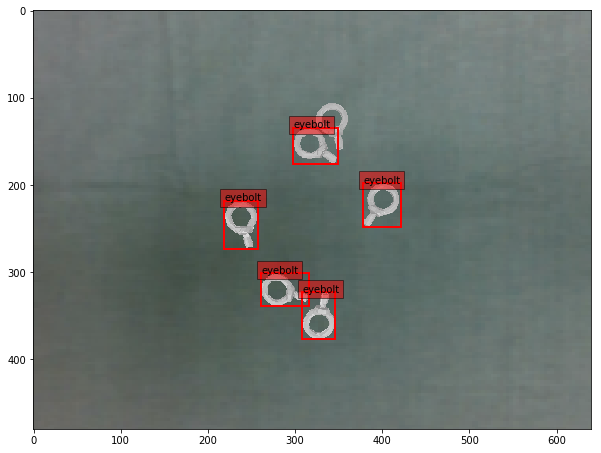

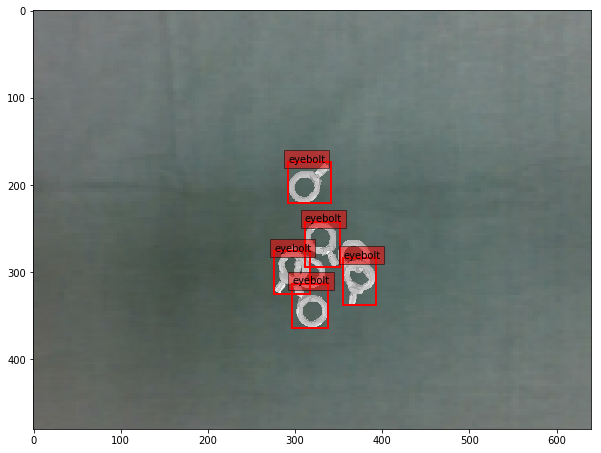

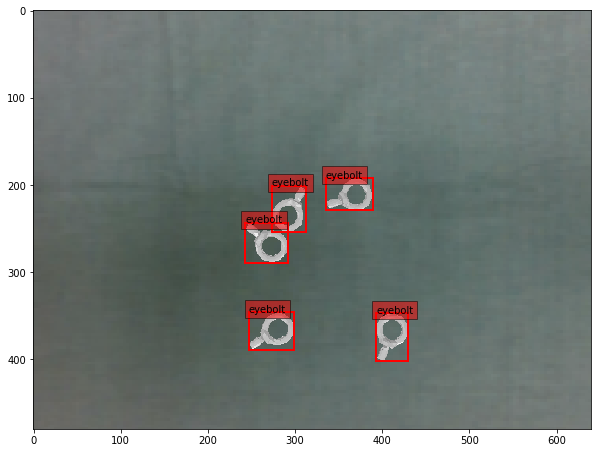

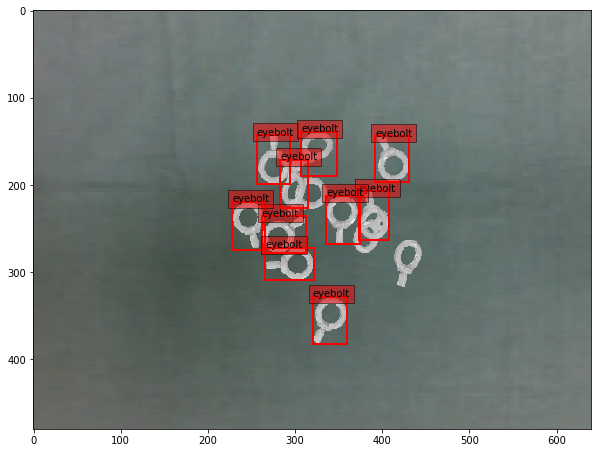

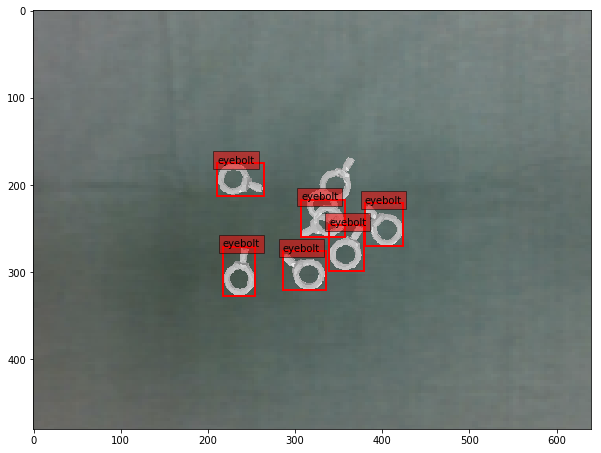

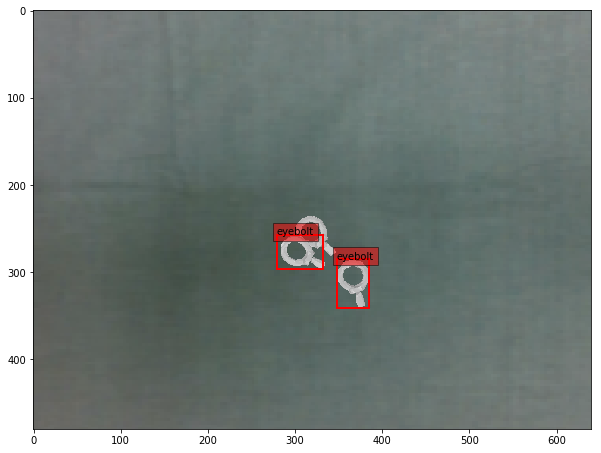

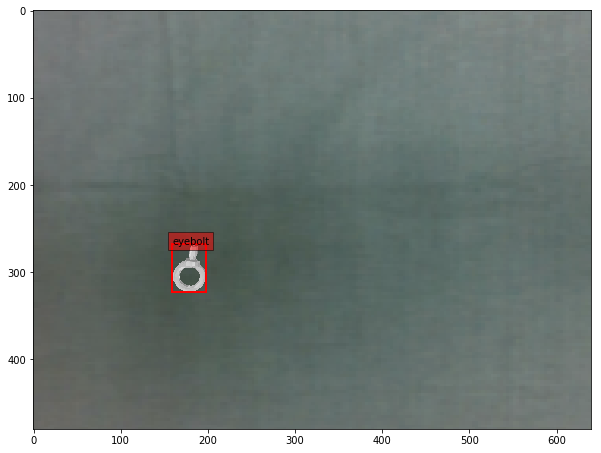

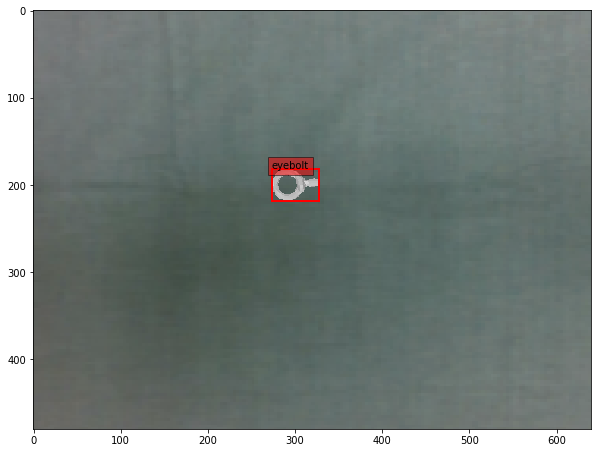

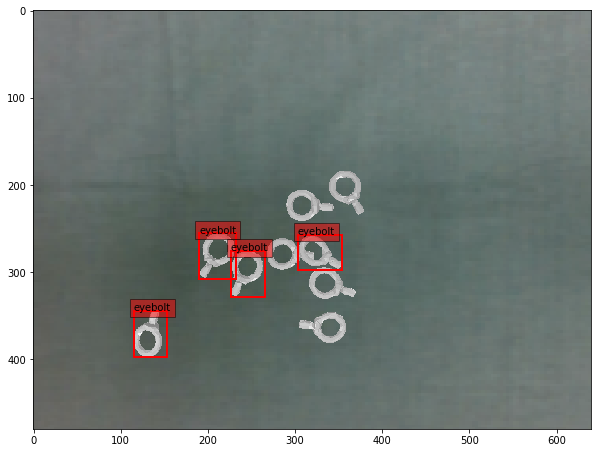

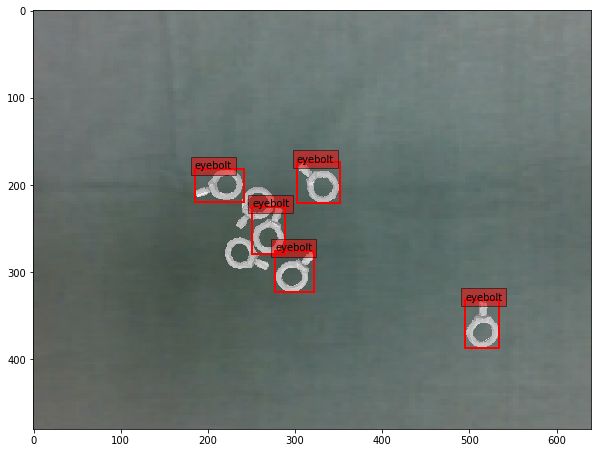

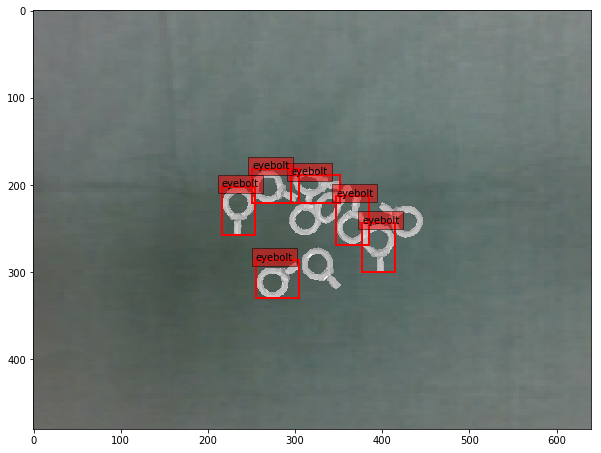

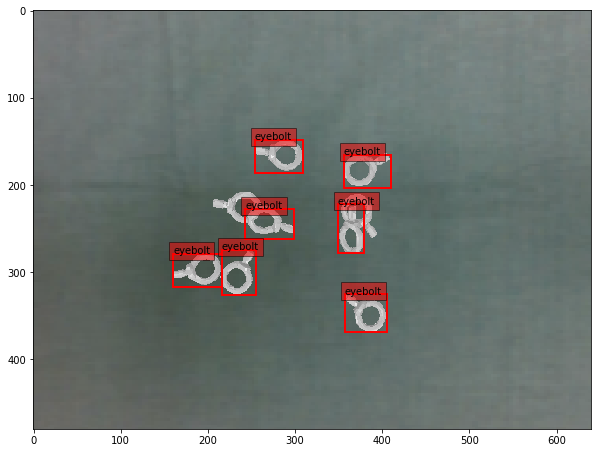

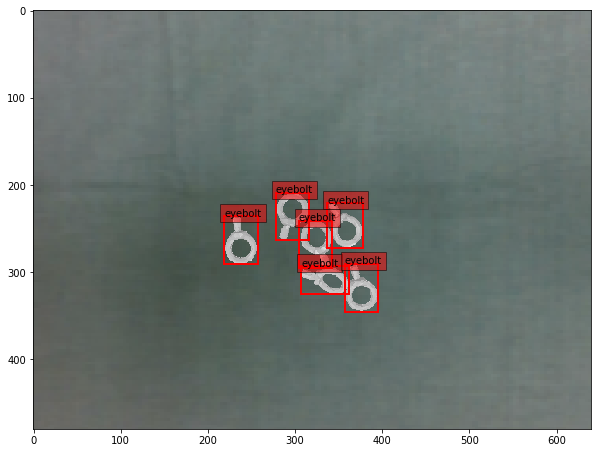

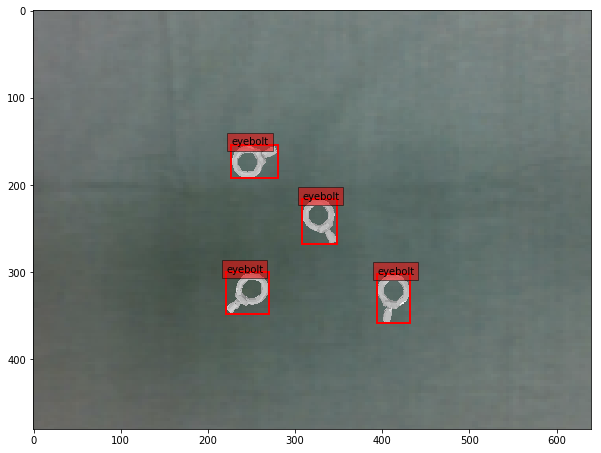

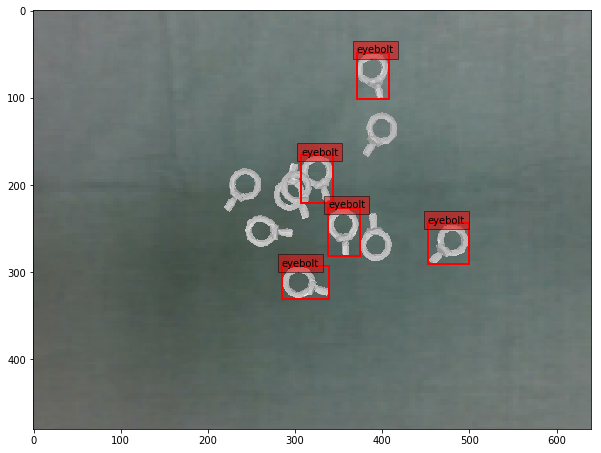

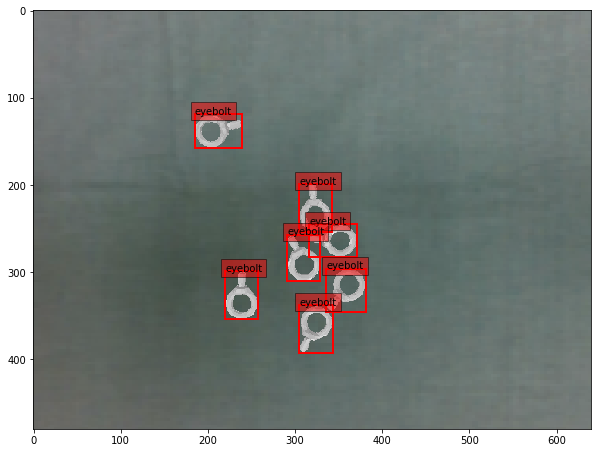

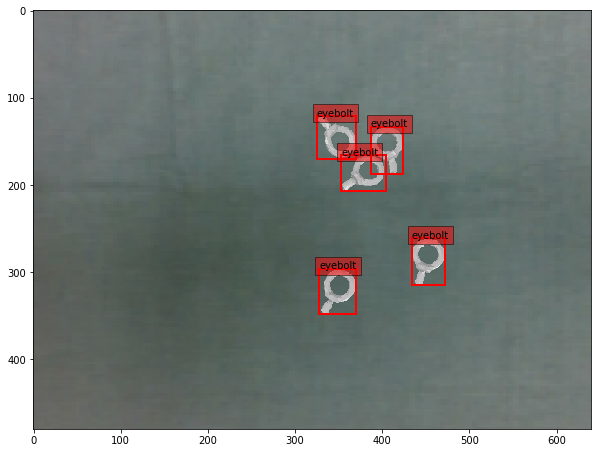

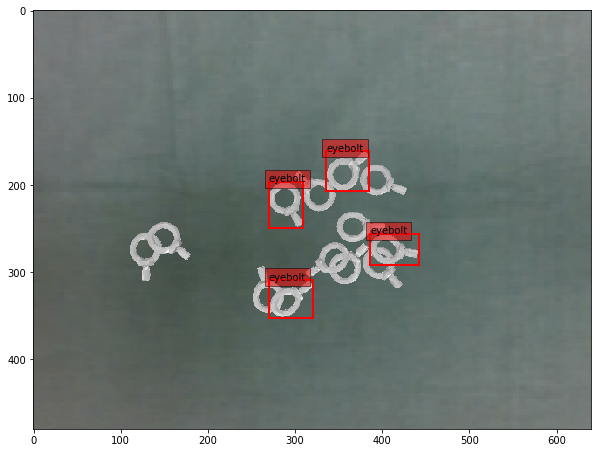

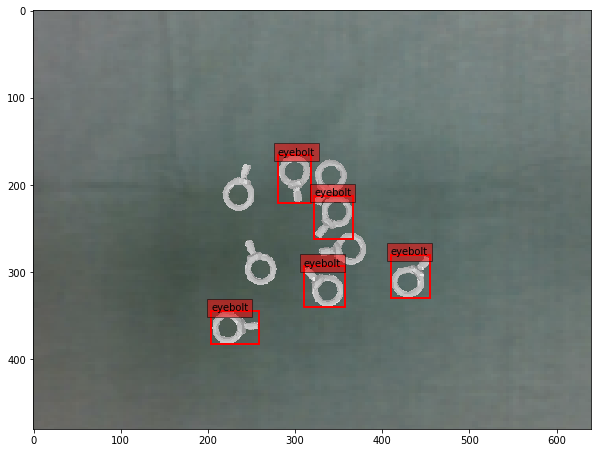

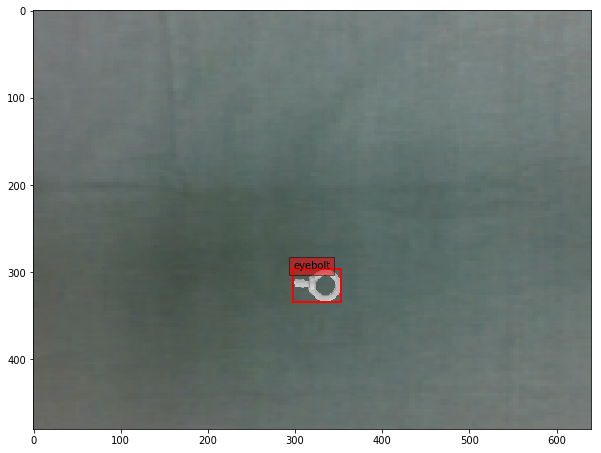

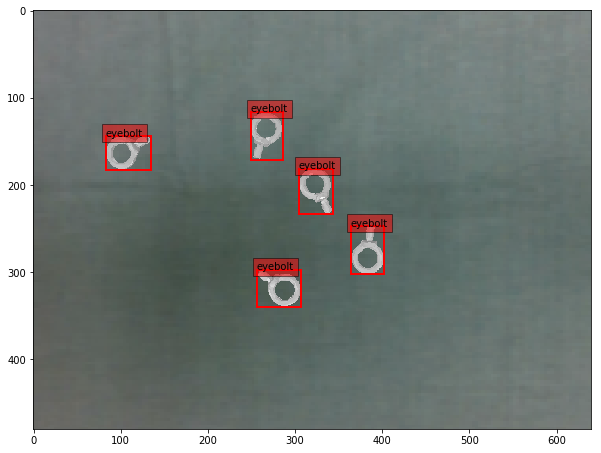

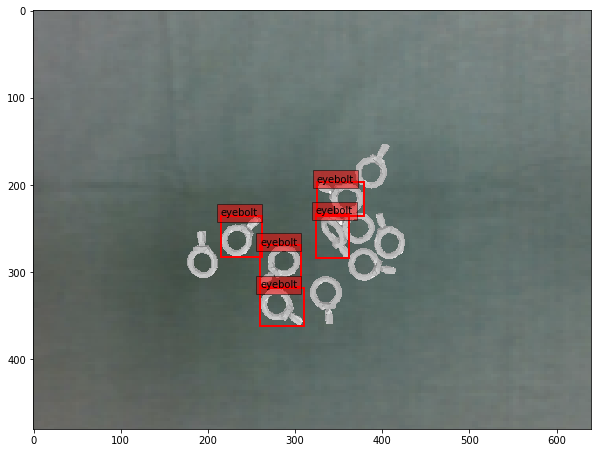

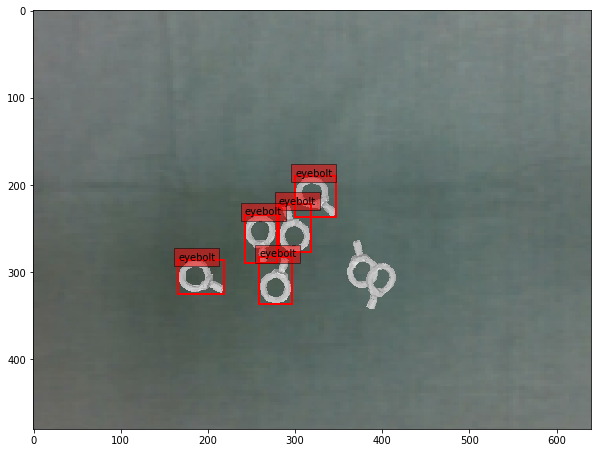

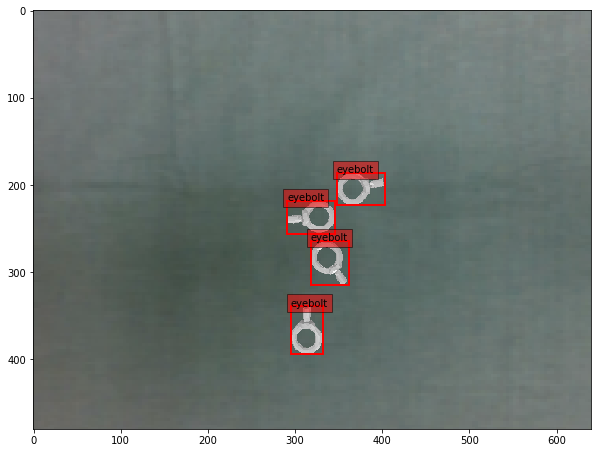

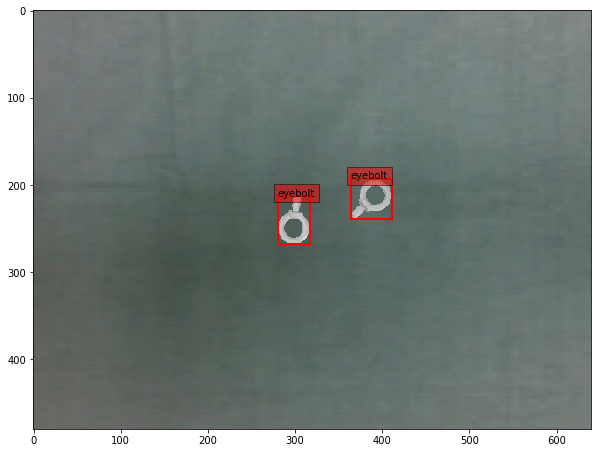

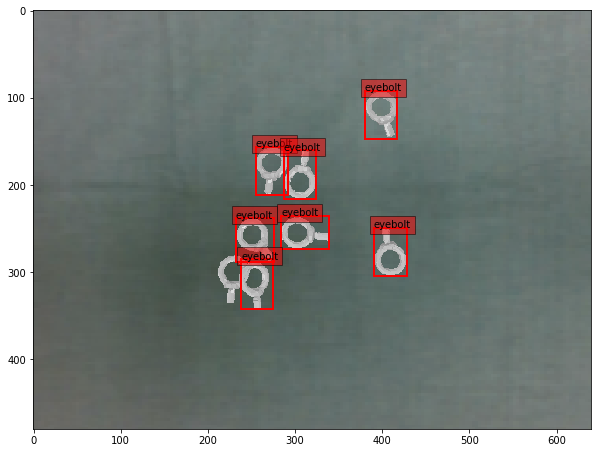

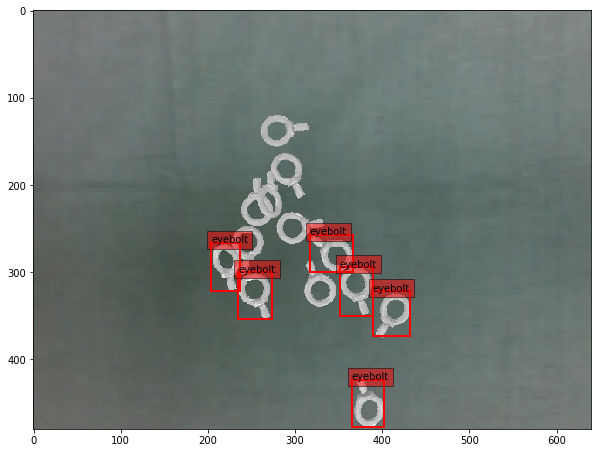

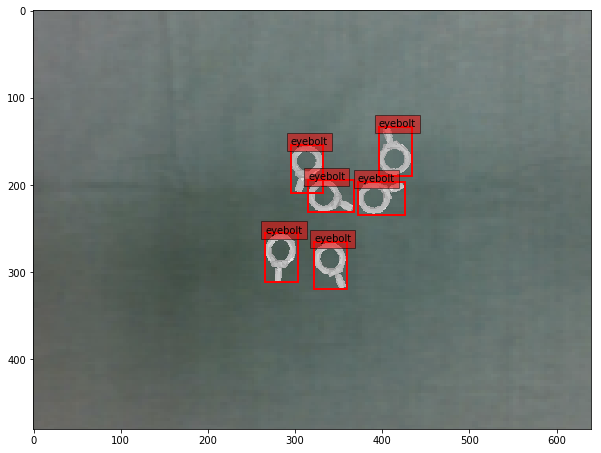

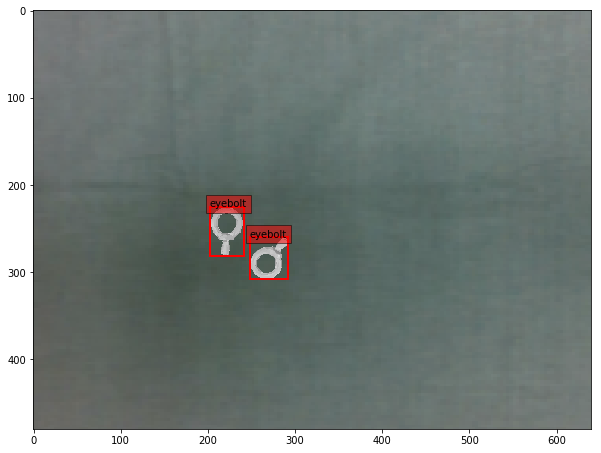

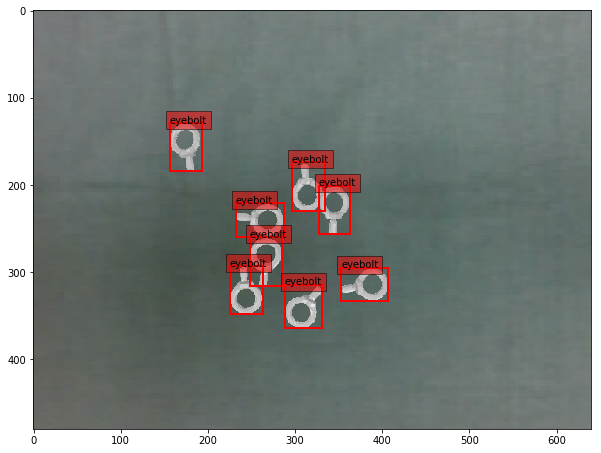

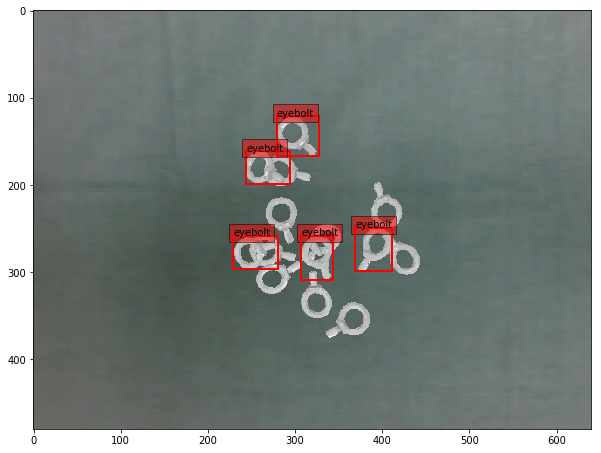

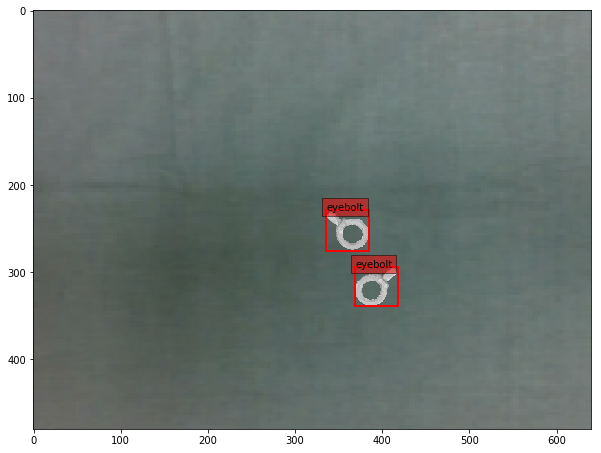

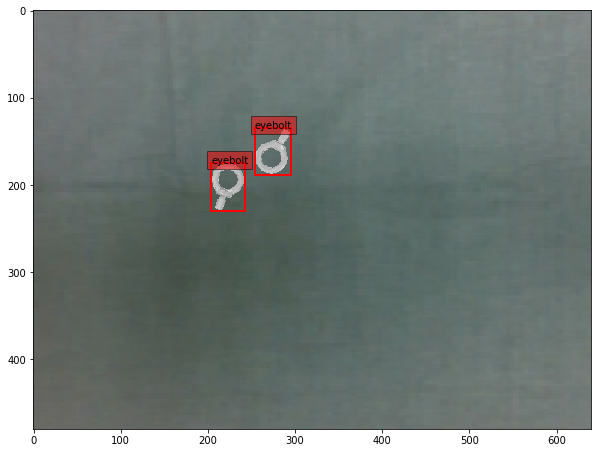

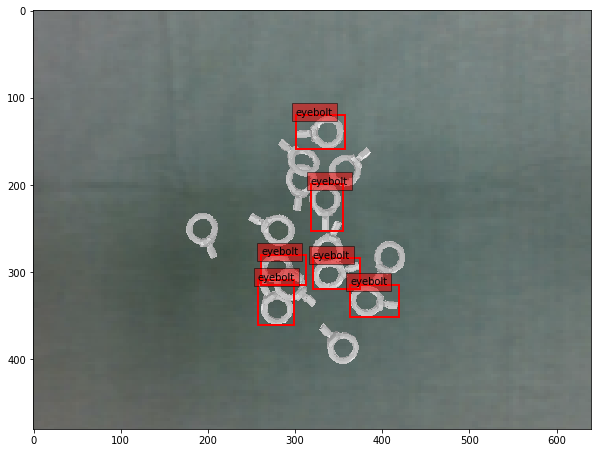

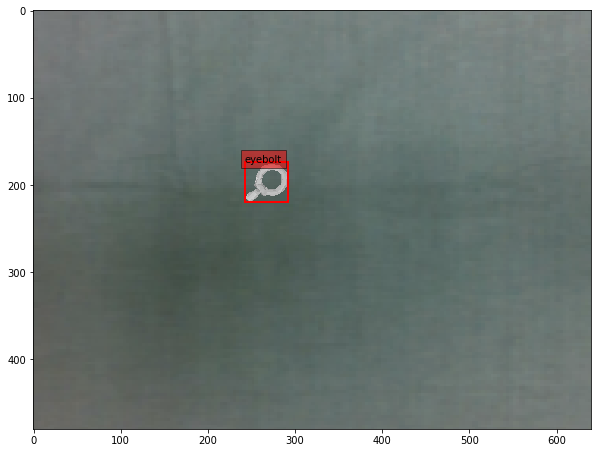

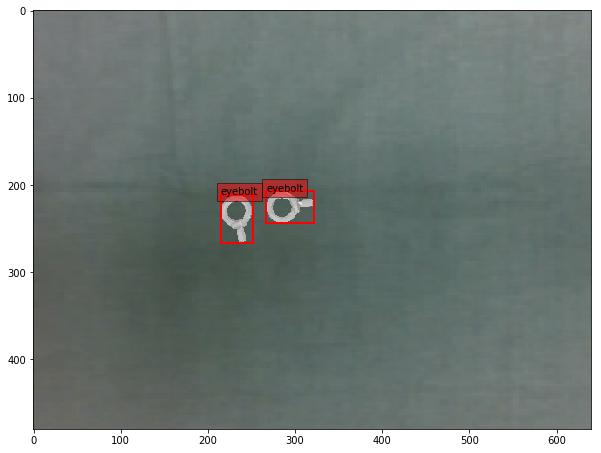

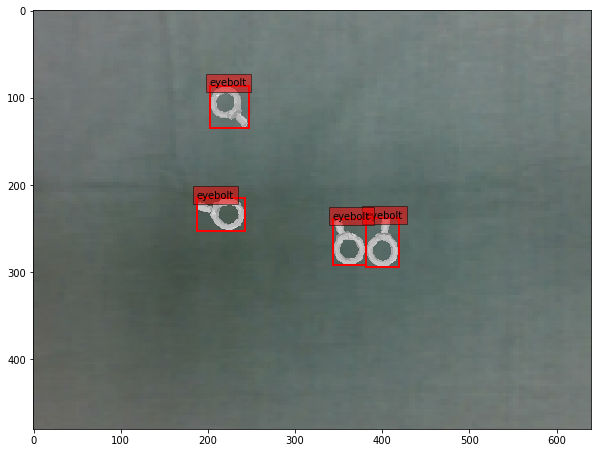

In [50]:
root = r'Z:\object_detection\2019_03_05_180242\data'
annotation_pathlist = glob.glob(os.path.join(root,'annotation','*.xml'))
image_pathlist = glob.glob(os.path.join(root,'color-images','*.png'))
CLASSES = ('eyebolt',)
colors = plt.cm.hsv(np.linspace(0, 1, len(CLASSES))).tolist()
target_transform = AnnotationTransform(class_to_index=dict(zip(CLASSES, range(len(CLASSES)))))

for image_path,annotation_path in zip(image_pathlist,annotation_pathlist):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    targets = target_transform(annotation_path)
    plt.figure(figsize=(10,10))
    currentAxis = plt.gca()
    plt.imshow(image)
    for target in targets:
        label_name = CLASSES[target[-1]]
        display_txt = '{}'.format(label_name)
    #     target[0] *= image.shape[1]
    #     target[1] *= image.shape[0]
    #     target[2] *= image.shape[1]
    #     target[3] *= image.shape[0]
        coords = (target[0],target[1]), target[2]-target[0]+1, target[3]-target[1]+1
        color = colors[target[4]]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(target[0], target[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
    plt.show()